In [27]:
import numpy as np
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

# Question 1

In [7]:
def answer_one():
    df = pd.read_csv("data/fraud_data.csv")
    positive_cases = df[df.Class == 1].shape[0] / df.shape[0]

    return positive_cases

answer_one()

0.016410823768035772

# Question 2

In [8]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score

In [13]:
def answer_two():
    dummy_model = DummyClassifier(strategy = "most_frequent")
    dummy_model.fit(X_train, y_train)
    y_predict = dummy_model.predict(X_test)

    #return accuracy_score(y_test, y_predict), recall_score(y_test, y_predict)
    return dummy_model.score(X_test, y_test), recall_score(y_test, y_predict)

answer_two()

(0.9852507374631269, 0.0)

# Question 3

In [14]:
from sklearn.metrics import precision_score
from sklearn.svm import SVC

def answer_three():
    model = SVC()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    return model.score(X_test, y_test), recall_score(y_test, y_predict), precision_score(y_test, y_predict)

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

# Question 4

In [19]:
from sklearn.metrics import confusion_matrix

def answer_four():
    model = SVC(C = 1e9, gamma = 1e-07)
    model.fit(X_train, y_train)
    
    # Decision function score
    y_score = model.decision_function(X_test)

    # Set threshold to -220
    y_score = np.where(y_score > -220, 1, 0)

    return confusion_matrix(y_test, y_score)

answer_four()[1][1]

66

# Question 5

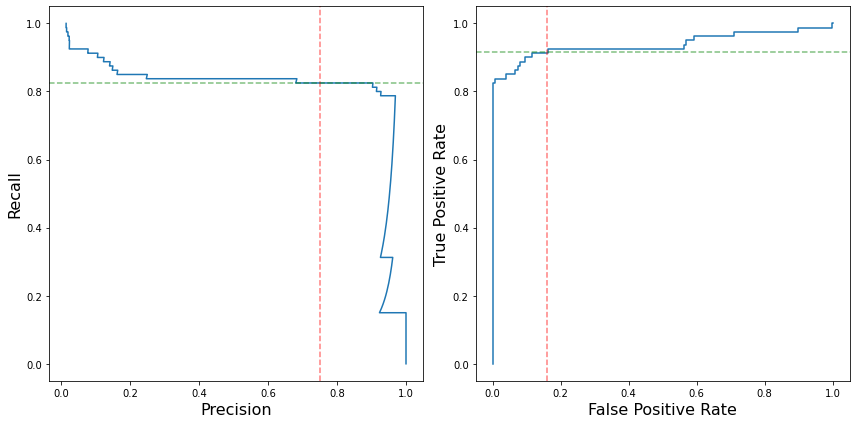

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(X_train, y_train)

y_scores = model.decision_function(X_test)
y_predict = model.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

fig, axes = plt.subplots(1, 2, figsize = (12, 6))

# Left axis
axes[0].plot(precision, recall, label='Precision-Recall Curve')

axes[0].axvline(0.75, linestyle = "--", color = "r", alpha = .5)
axes[0].axhline(0.825, linestyle = "--", color = "g", alpha = .5)

axes[0].set_xlabel('Precision', fontsize=16)
axes[0].set_ylabel('Recall', fontsize=16)

# Right axis
axes[1].plot(fpr, tpr, label='Precision-Recall Curve')

axes[1].axvline(0.16, linestyle = "--", color = "r", alpha = .5)
axes[1].axhline(0.915, linestyle = "--", color = "g", alpha = .5)

axes[1].set_xlabel('False Positive Rate', fontsize=16)
axes[1].set_ylabel('True Positive Rate', fontsize=16)

plt.tight_layout()
plt.show()

In [70]:
mask = (precision == 0.75)
recall[mask]

array([0.825])

In [79]:
mask2 = (fpr > 0.14) & (fpr < 0.17)
fpr[mask2][0]

0.16261227544910178

In [81]:
def answer_five():
    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_scores = model.decision_function(X_test)
    y_predict = model.predict(X_test)

    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    mask1 = (precision == 0.75)
    mask2 = (fpr > 0.15) & (fpr < 0.17)

    return recall[mask1][0], tpr[mask2][0]

answer_five()

(0.825, 0.9125)

# Question 6

In [185]:
from sklearn.model_selection import GridSearchCV

def answer_six():
    model = LogisticRegression()
    params = {'penalty' : ['l1', 'l2'], 'C' : [0.01, 0.1, 1, 10, 100]}

    grid = GridSearchCV(model, param_grid = params, scoring = "recall", cv = 3)
    grid.fit(X_train, y_train)

    result = grid.cv_results_

    l1_indexes = list(range(0, 10, 2))
    l2_indexes = list(range(1, 10, 2))
    C_indexes = [0.01, 0.1, 1, 10, 100]

    l1_0 = []
    l2_0 = []
    l1_1 = []
    l2_1 = []
    l1_2 = []
    l2_2 = []

    for ind, val in enumerate(l1_indexes):
        l1_0.append(result['split0_test_score'][val])
        l2_0.append(result['split0_test_score'][l2_indexes[ind]])

        l1_1.append(result['split1_test_score'][val])
        l2_1.append(result['split1_test_score'][l2_indexes[ind]])

        l1_2.append(result['split2_test_score'][val])
        l2_2.append(result['split2_test_score'][l2_indexes[ind]])

    l2 = list(map(lambda x, y, z: (x + y + z) / 3, l2_0, l2_1, l2_2))
    l1 = list(map(lambda x, y, z: (x + y + z) / 3, l1_0, l1_1, l1_2))

    return np.transpose(np.array((l1, l2)))

answer_six()

array([[       nan, 0.79347826],
       [       nan, 0.80072464],
       [       nan, 0.78985507],
       [       nan, 0.80434783],
       [       nan, 0.80072464]])

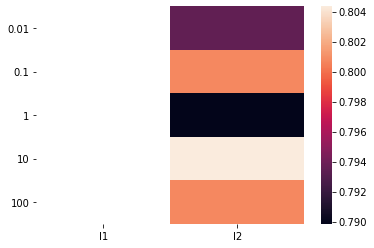

In [186]:
import seaborn as sns

# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())